# <div align = 'center'>**Logistic Regression**</div>

---

### **1. What is Logistic Regression?**
Logistic Regression is a **supervised learning algorithm** used for **classification problems**. It predicts the probability of an instance belonging to a particular class. Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts probabilities using the **Sigmoid (logistic) function**.

---

### **2. Key Concepts**

#### **2.1 Sigmoid Function**
The Sigmoid function maps any real-valued number to a value between 0 and 1, making it ideal for probability estimation. The function is defined as:

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

Where:
- $ h_\theta(x) $: Predicted probability.
- $ \theta $: Model parameters (weights and bias).
- $ x $: Input features.

The output of the Sigmoid function is interpreted as the probability of the positive class (e.g., $ P(y=1|x) $).

   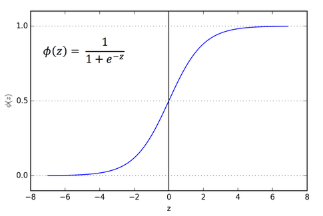

---

#### **2.2 Decision Boundary**
- Logistic Regression uses a **threshold** (commonly 0.5) to classify instances:
  - If $ h_\theta(x) \geq 0.5 $, predict $ y = 1 $ (positive class).
  - If $ h_\theta(x) < 0.5 $, predict $ y = 0 $ (negative class).
- The decision boundary is the line (or hyperplane) that separates the two classes.

---

### **3. Types of Logistic Regression**
1. **Binary Logistic Regression**:
   - Used for binary classification problems (e.g., yes/no, true/false, 0/1).
   - Example: Predicting whether a customer will purchase a product.

2. **Multinomial Logistic Regression**:
   - Used for multi-class classification problems (e.g., classifying into 3 or more categories).
   - Example: Predicting the type of product a customer will buy.

3. **Ordinal Logistic Regression**:
   - Used for ordered multi-class classification problems.
   - Example: Predicting customer satisfaction levels (low, medium, high).

---

### **4. Cost Function**
The cost function for Logistic Regression is based on the **log-loss** (logarithmic loss) function:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$


Where:
- $ m $: Number of training examples.
- $ y^{(i)} $: Actual label for the $ i $-th example.
- $ h_\theta(x^{(i)}) $: Predicted probability for the $ i $-th example.

The goal is to minimize this cost function using optimization techniques like **Gradient Descent**.

---

### **5. Applications of Logistic Regression**
1. **Healthcare**:
   - Predicting whether a patient has a disease (e.g., diabetes, cancer).
2. **Finance**:
   - Predicting loan defaults or credit card fraud.
3. **Marketing**:
   - Predicting customer churn or purchase behavior.
4. **Social Media**:
   - Classifying spam emails or detecting fake accounts.

---

### **6. Advantages**
1. **Simplicity**:
   - Easy to implement and interpret.
2. **Efficiency**:
   - Works well for linearly separable datasets.
3. **Probabilistic Output**:
   - Provides probabilities for predictions, which can be useful for decision-making.

---

### **7. Disadvantages**
1. **Linear Assumption**:
   - Assumes a linear relationship between features and the log-odds, which may not always hold.
2. **Sensitive to Outliers**:
   - Outliers can significantly affect the model's performance.
3. **Not Suitable for Complex Relationships**:
   - Cannot capture non-linear relationships without feature engineering or transformations.

---

### **8. Python Implementation**

Here’s an example of implementing Logistic Regression using Python:



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### 8.1 Load the Data

In [3]:
np.random.seed(0)
n_samples = 400
ages = np.random.randint(18, 65, n_samples) 
salaries = ages * 1200 + np.random.randint(-5000, 5000, n_samples) 

purchased = (ages * 0.4 + salaries * 0.00008 + np.random.normal(0, 1, n_samples)) > 25
purchased = purchased.astype(int)

df = pd.DataFrame({'Age': ages, 'Salary': salaries, 'Purchased': purchased})

X = df[['Age', 'Salary']].values  
y = df['Purchased'].values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### Train Logistic regression model

In [6]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

#### Evaluation

In [8]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9750

Confusion Matrix:
 [[59  0]
 [ 2 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       1.00      0.90      0.95        21

    accuracy                           0.97        80
   macro avg       0.98      0.95      0.97        80
weighted avg       0.98      0.97      0.97        80



#### Visualization of Decision Boundry

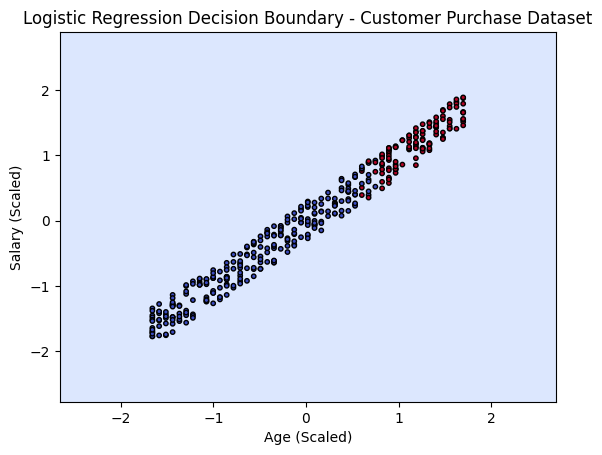

In [9]:
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = model.predict(poly.transform(scaler.transform(np.c_[xx.ravel(), yy.ravel()])))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', s=10)
plt.xlabel("Age (Scaled)")
plt.ylabel("Salary (Scaled)")
plt.title("Logistic Regression Decision Boundary - Customer Purchase Dataset")
plt.show()

---

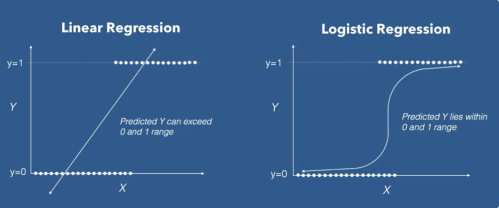